In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

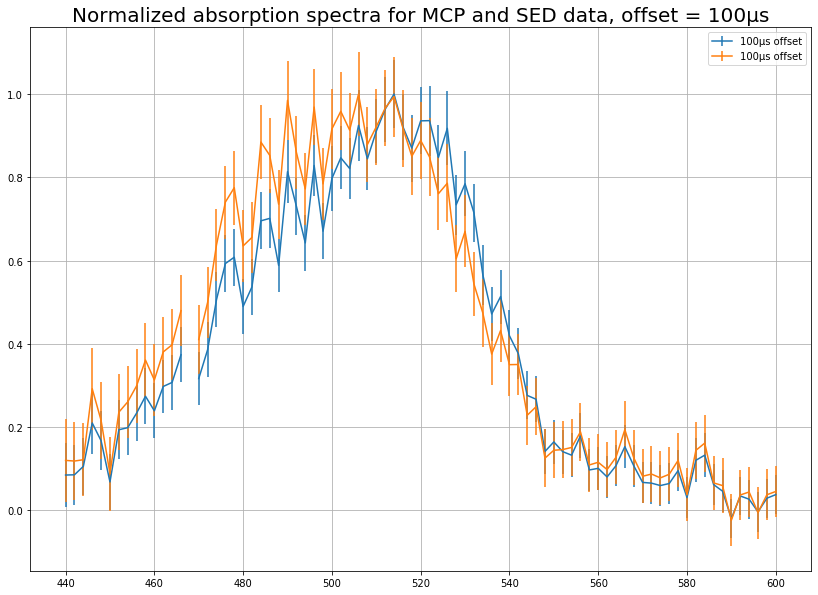

In [83]:
# CROSS SECTION
from spectrum_analysis_function import spectrum_analysis

# Loading data
offset = 100
lambdas_no_offset, css_no_offset, uncs_no_offset, fig_no_offset = spectrum_analysis("C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/MCP_Laser_440_600_run012_15-02-22.txt", "C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/MCP_NoLaser_440_600_run012_15-02-22.txt", "C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/energy_data.txt", False, 0)
lambdas_100µs_offset, css_100µs_offset, uncs_100µs_offset, fig_100µs_offset = spectrum_analysis("C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/MCP_Laser_440_600_run012_15-02-22.txt", "C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/MCP_NoLaser_440_600_run012_15-02-22.txt", "C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/energy_data.txt", False, offset)

# Plotting normalized spectra
fig = plt.figure(figsize=(14,10))
plt.errorbar(lambdas_no_offset, css_no_offset/max(css_no_offset), uncs_no_offset/max(css_no_offset),label= str(offset) + 'µs offset')
plt.errorbar(lambdas_100µs_offset, css_100µs_offset/max(css_100µs_offset), uncs_100µs_offset/max(css_100µs_offset),label= str(offset) + 'µs offset')
plt.title('Normalized absorption spectra for MCP and SED data, offset = ' + str(offset) + 'µs', fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [88]:
def pc(data_0_40, data_40_100):
    d0_40 = np.loadtxt(data_0_40)
    d40_100 = np.loadtxt(data_40_100)
    
    data = pd.DataFrame(d0_40, d_40_100)

    return data

test = pc("C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/2-40_pc_run007_15-02-22.txt", "C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/40-100_pc_run007_15-02-22.txt")
print(test)

ValueError: could not convert string to float: 'Datafile:'